# Census Income

# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Feature Columns:
1.Age: Age of the civilians.

2.Workclass: working class of the civilians (Federal-gov, Local-gov, Never-Worked, Private, Self-emp-inc, self-emp-not-inc, state-gov, without-pay)

3.Fnlwgt: (Final Weight)

4.Education: education level of the civilians

5.Education_num : shows the number of years of study completed by the civilians.

6.Marital_status : shows marital status of the civilians.

7.Occupation : occupation of the civilians.

8.Relationship : shows relationship status

9.Race : shows race of the civilians. ( Asian-Pac-Islander, White, Black, Amer-Indian-Eskimo, other)

10.Sex : sex of the civilians (Male, Female)

11.Capital_gain : capital gains

12.Capital_loss : capital loss

13.Hours_per_week : average of hours worked per week

14.Native_country : Country of origin

Target Coulmn:
15.Income : This is the target column.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading Dataset

In [2]:
df = pd.read_csv('Census.csv')


In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.shape

(32560, 15)

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


total 6 coulmns having datatype integer and the remaining 9 columns having the datatype object

In [9]:
# Checking for the missing values in the dataset

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null value is present

In [10]:
# Checking for numerical and categorical features.

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print('Numerical features in the dataset are:\n',nf,'\n','-'*70,'\n Categorical features in the dataset are:\n',cf)

Numerical features in the dataset are:
 Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object') 
 ---------------------------------------------------------------------- 
 Categorical features in the dataset are:
 Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


# Visualization

In [11]:
# Check values counts in the 'income' column
income_counts = df['Income'].value_counts()

income_counts

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

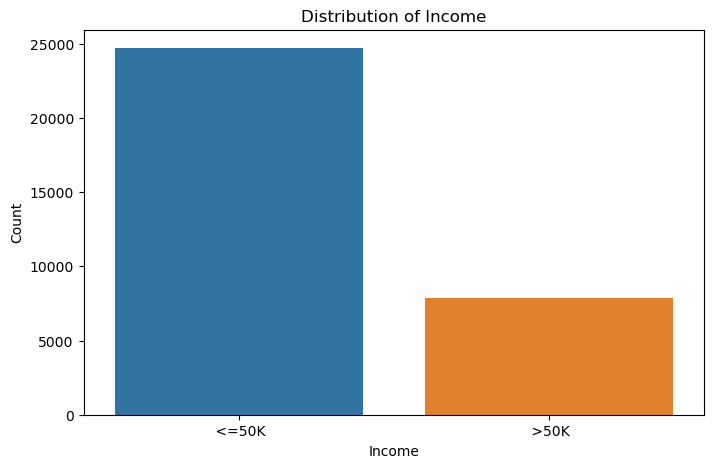

In [12]:
# Plot the distribution of the 'income' column
plt.figure(figsize=(8, 5))
sns.countplot(x='Income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

 Here Target data is imbalance. we will balance later

1.workclass

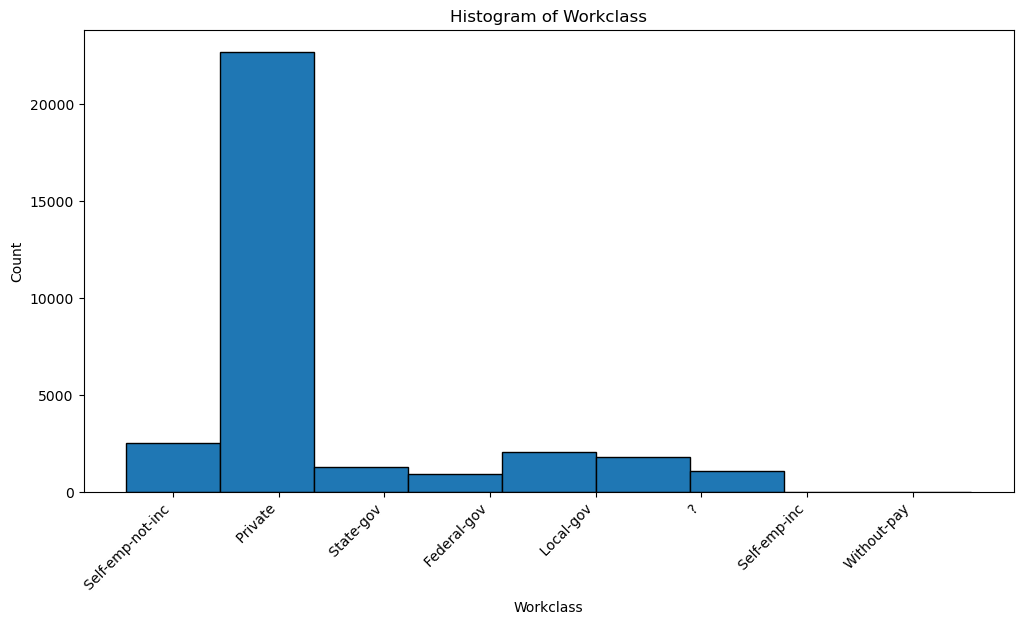

Workclass Counts:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


In [13]:
workclass_counts = df['Workclass'].value_counts()

# Plot a histogram
plt.figure(figsize=(12, 6))
plt.hist(df['Workclass'], bins=len(workclass_counts), align='left', edgecolor='black')
plt.title('Histogram of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Display the counts of each category
print("Workclass Counts:")
print(workclass_counts)

large number of people belong to private workclass

2.Education

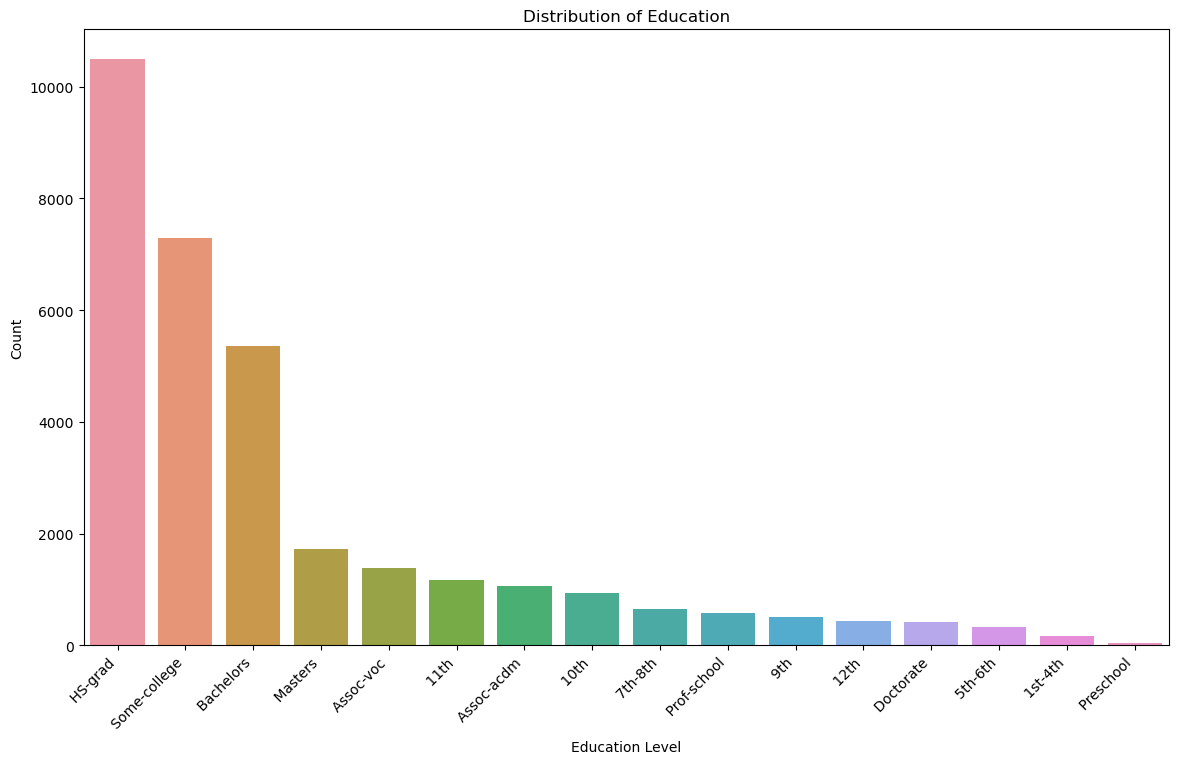

Education Counts:
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


In [14]:
# Checking for the distribution of Education column.
education_counts = df['Education'].value_counts()

# Plot the distribution of the 'Education' column
plt.figure(figsize=(14, 8))
sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index)
plt.title('Distribution of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# Display the counts of each category
print("Education Counts:")
print(education_counts)

The above graph shows that maximum persons having the High school graduation as their education.

3.Gender

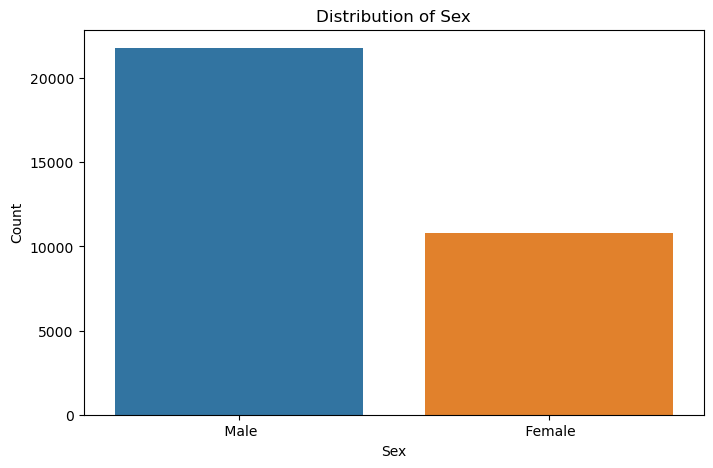

Sex Counts:
 Male      21789
 Female    10771
Name: Sex, dtype: int64


In [15]:
# Plotting graph to show the distribution of 'Sex' column
sex_counts = df['Sex'].value_counts()

# Plot the distribution of the 'Sex' column
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df, order=df['Sex'].value_counts().index)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Display the counts of each category
print("Sex Counts:")
print(sex_counts)

Male category is more than female

4.Race

Race Value Counts:
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


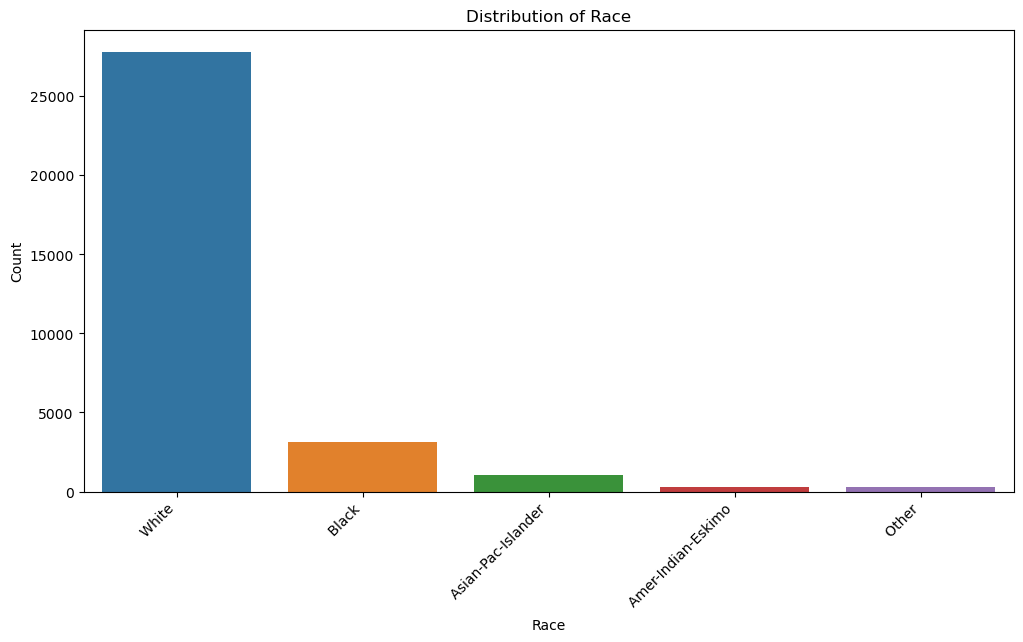

In [16]:
# Checking for the value counts of the 'Race' column.
race_counts = df['Race'].value_counts()

# Display the value counts
print("Race Value Counts:")
print(race_counts)

# Plot the distribution of the 'Race' column
plt.figure(figsize=(12, 6))
sns.countplot(x='Race', data=df, order=df['Race'].value_counts().index)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Maximum person are of white race

1. Age Vs Income:

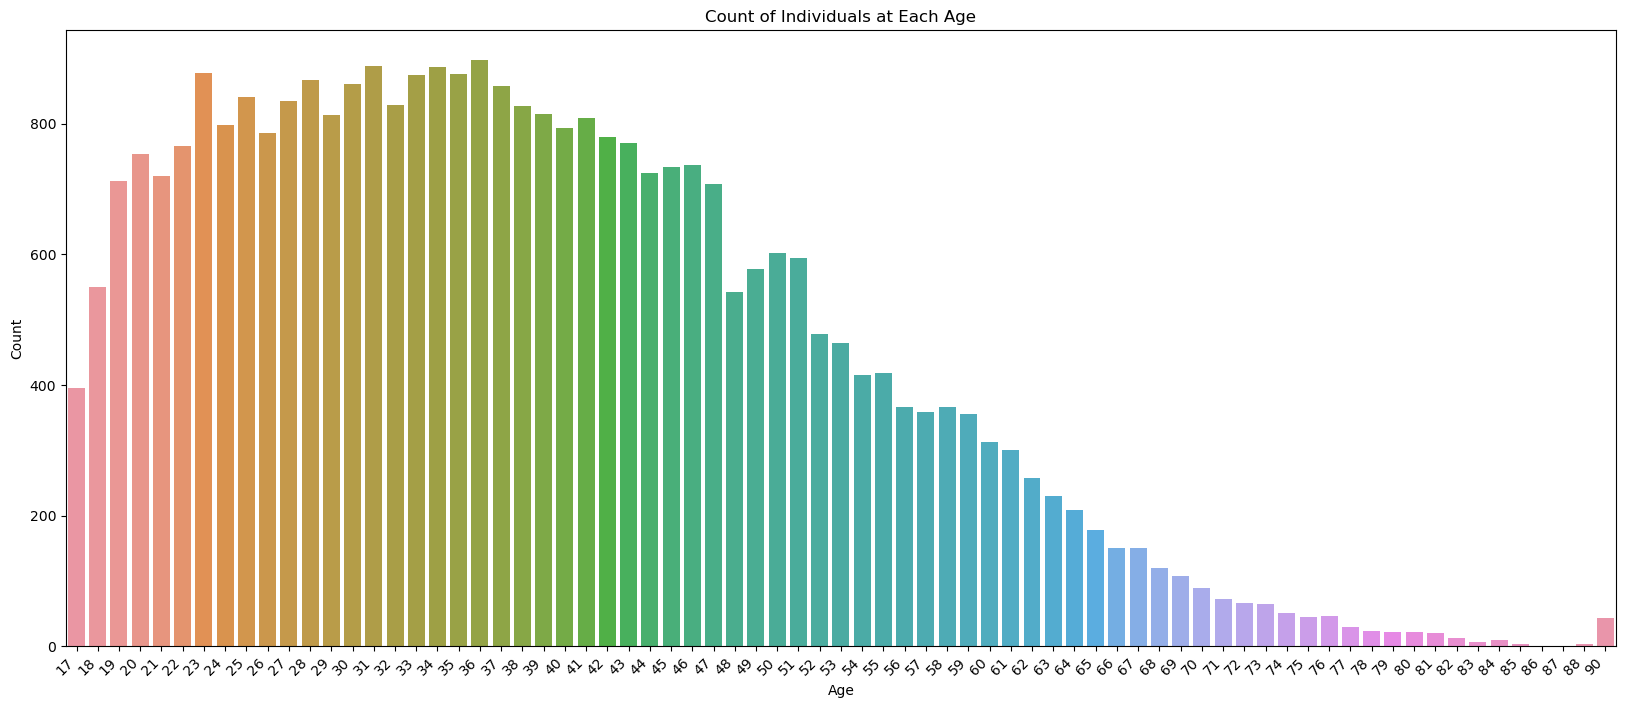

In [17]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Age', data=df)
plt.title('Count of Individuals at Each Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

IN this graph it shows that maximum belong to Age 19 to 50.

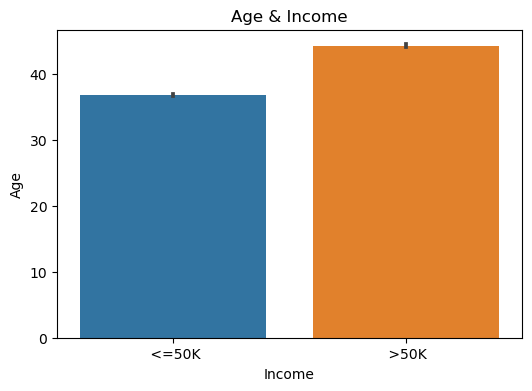

In [18]:
# Plotting bargraph to show the relation between the 'Age' and 'Income'
plt.figure(figsize=[6,4])
sns.barplot(x='Income', y='Age', data = df)
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Age & Income')
plt.show()

Here it shows that person with more age have higher salary than younger age

2.FinalWeight Vs Income:


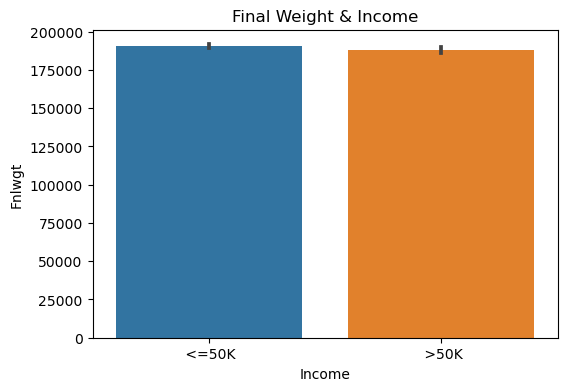

In [19]:
# Plotting bargraph to show the relation between the 'Final Weight' and 'Income'
plt.figure(figsize=[6,4])
sns.barplot(x='Income', y='Fnlwgt', data = df)
plt.xlabel('Income')
plt.ylabel('Fnlwgt')
plt.title('Final Weight & Income')
plt.show()

the above graph that both shows value approx same value

# Label Encoder

In [20]:
# Categorical features in the dataset
categorical_features = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the updated dataset with label-encoded categorical features
print(df.head())

   Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          6   83311          9             13               2   
1   38          4  215646         11              9               0   
2   53          4  234721          1              7               2   
3   28          4  338409          9             13               2   
4   37          4  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           4             0     4    1             0             0   
1           6             1     4    1             0             0   
2           6             0     2    1             0             0   
3          10             5     2    0             0             0   
4           4             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              39       0  
1              40              39       0  
2              40   

In [21]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

all feature is in int.

# Statistical Summary

In [22]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Correlation

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


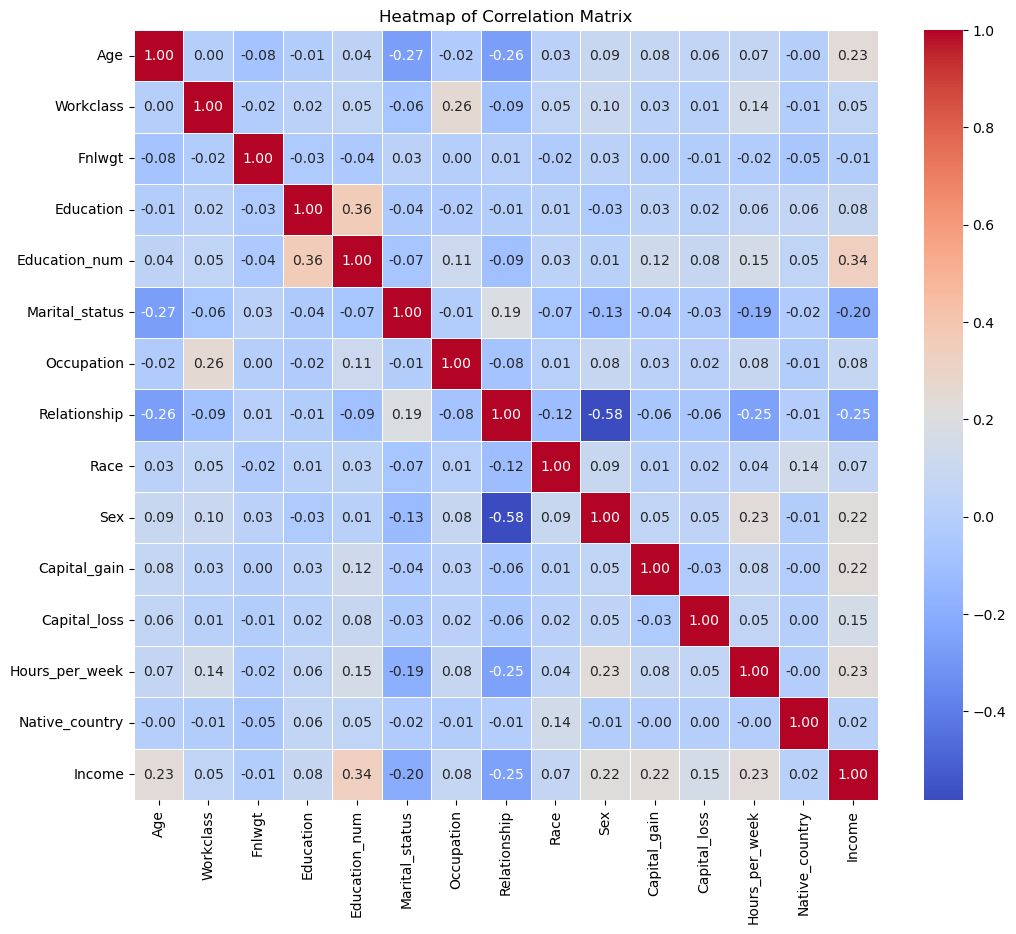

In [24]:
# Plot a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

1.0% to 30% (or 0 to 0.3): Weak correlation
    
2.30% to 70% (or 0.3 to 0.7): Moderate correlation
    
3.70% to 100% (or 0.7 to 1): Strong correlation
    
Similarly, negative values indicate a negative correlation, and positive values indicate a positive correlation.

 the correlation coefficients in your matrix:

Age vs. Hours_per_week (0.07): Weak positive correlation (7%)
    
Education_num vs. Income (0.34): Moderate positive correlation (34%)
    
Relationship vs. Sex (-0.58): Strong negative correlation (-58%)
    
Capital_gain vs. Income (0.22): Weak positive correlation (22%)
    
Age vs. Marital_status (-0.27): Moderate negative correlation (-27%)

# Check Outlier

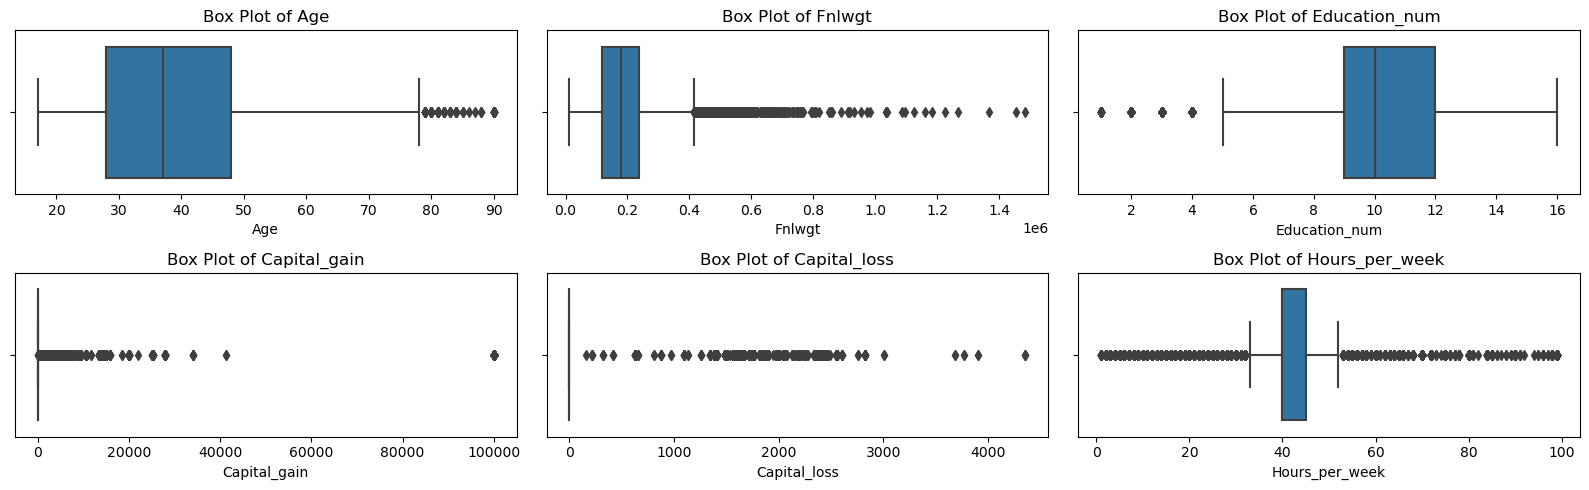

In [25]:
numerical_features = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

# Create box plots for numerical features
plt.figure(figsize=(16, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

outliers are present in all above feature

# Skewness

In [26]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

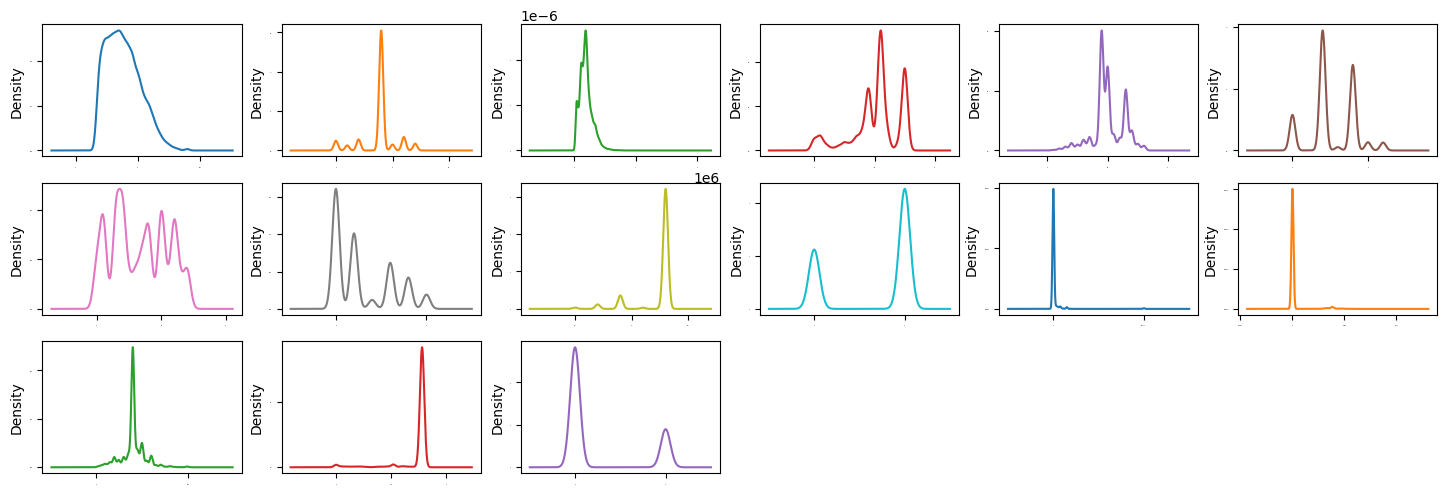

In [27]:
df.plot(kind='density', subplots=True, layout=(6,6), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

1.Age (0.56): Slightly right-skewed.
    
2.Workclass (-0.75): Left-skewed.
    
3.Fnlwgt (1.45): Right-skewed.
    
4.Education (-0.93): Left-skewed.
    
5.Education_num (-0.31): Left-skewed.
    
6.Marital_status (-0.01): Close to symmetric.
    
7.Occupation (0.11): Slightly right-skewed.
    
8.Relationship (0.79): Right-skewed.
    
9.Race (-2.44): Highly left-skewed.
    
10.Sex (-0.72): Left-skewed.
    
11.Capital_gain (11.95): Highly right-skewed.
    
12.Capital_loss (4.59): Right-skewed.
    
13.Hours_per_week (0.23): Slightly right-skewed.
    
14.Native_country (-3.66): Highly left-skewed.
    
15.Income (1.21): Right-skewed.

# Data cleaning

# Remove Outlier

Zscore technique

In [28]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape
thershold = 3
print (np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [29]:
df_new = df[(z<3).all(axis=1)]
print('The shape of original dataset is ',df.shape)
print('The shape of dataset after removing the outliers is ',df_new.shape)

The shape of original dataset is  (32560, 15)
The shape of dataset after removing the outliers is  (27417, 15)


In [30]:
#Percentage lost
loss_per = ((32560-27417)/32560)*100
print('data lost is ', loss_per,'%')

data lost is  15.795454545454547 %


# Remove Skewness

In [31]:
# Splitting the dataset into independent and target variables:

x = df_new.drop("Income", axis=1)
y = df_new["Income"]

Power Transform

In [32]:
from sklearn.preprocessing import power_transform
x = power_transform(x)

x

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

Standard Scaler

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

# Oversampling

In [34]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [35]:
y_over.value_counts()

0    21279
1    21279
Name: Income, dtype: int64

Target column Balanced

# Best Random Sate

In [36]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7875939849624061  on Random_State  29


# Data preprocessing:

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=29)

# LogisticRegression

In [42]:
 from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
#Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=29)
LogisticRegression
# Train the model on the training data
logreg_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.79
Confusion Matrix:
[[4850 1475]
 [1237 5206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      6325
           1       0.78      0.81      0.79      6443

    accuracy                           0.79     12768
   macro avg       0.79      0.79      0.79     12768
weighted avg       0.79      0.79      0.79     12768



# SVC

In [45]:
from sklearn.svm import SVC
# Initialize the Support Vector Classifier model
svc_model = SVC(random_state=29)

# Train the model on the training data
svc_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.84
Confusion Matrix:
[[4887 1438]
 [ 640 5803]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6325
           1       0.80      0.90      0.85      6443

    accuracy                           0.84     12768
   macro avg       0.84      0.84      0.84     12768
weighted avg       0.84      0.84      0.84     12768



# RandomForestClassifier

In [46]:
# Initialize the Random Forest classifier model
rf_model = RandomForestClassifier(random_state=29)

# Train the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.90
Confusion Matrix:
[[5640  685]
 [ 563 5880]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6325
           1       0.90      0.91      0.90      6443

    accuracy                           0.90     12768
   macro avg       0.90      0.90      0.90     12768
weighted avg       0.90      0.90      0.90     12768



# DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=29)

# Train the model on the training data
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.85
Confusion Matrix:
[[5347  978]
 [ 978 5465]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6325
           1       0.85      0.85      0.85      6443

    accuracy                           0.85     12768
   macro avg       0.85      0.85      0.85     12768
weighted avg       0.85      0.85      0.85     12768



# KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  

# Train the model on the training data
knn_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print the evaluation metrics for KNN

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Report:\n{classification_rep_knn}")

Accuracy: 0.85
Confusion Matrix:
[[4911 1414]
 [ 447 5996]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      6325
           1       0.81      0.93      0.87      6443

    accuracy                           0.85     12768
   macro avg       0.86      0.85      0.85     12768
weighted avg       0.86      0.85      0.85     12768



# Checking for the cross validation score:

In [49]:
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC()
]

# Perform cross-validation for each classifier
for classifier in classifiers:
    
    cv_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')

    # Display the cross-validation scores
    print(f"{classifier.__class__.__name__} Cross-Validation Scores:", cv_scores)
    print(f"{classifier.__class__.__name__} Mean Accuracy:", cv_scores.mean())
    print("\n")

LogisticRegression Cross-Validation Scores: [0.82239241 0.83187454 0.82929053 0.83093197 0.82837862]
LogisticRegression Mean Accuracy: 0.8285736178384671


RandomForestClassifier Cross-Validation Scores: [0.84883297 0.84846827 0.85117636 0.85755973 0.85099398]
RandomForestClassifier Mean Accuracy: 0.8514062629494813


DecisionTreeClassifier Cross-Validation Scores: [0.80725748 0.80488694 0.80083896 0.80448659 0.80393945]
DecisionTreeClassifier Mean Accuracy: 0.8042818842086401


KNeighborsClassifier Cross-Validation Scores: [0.82476295 0.81601021 0.82381908 0.82801386 0.8256429 ]
KNeighborsClassifier Mean Accuracy: 0.8236497985351713


SVC Cross-Validation Scores: [0.83442743 0.83862144 0.84005107 0.84223965 0.83530914]
SVC Mean Accuracy: 0.8381297447065681




In [50]:
#  accuracy and cross-validation scores
scores_data = {
    'Logistic Regression': {'Accuracy': 0.79, 'Cross-Validation Mean': 0.8285736178384671},
    'Random Forest Classifier': {'Accuracy': 0.90, 'Cross-Validation Mean': 0.8514062629494813},
    'Decision Tree Classifier': {'Accuracy': 0.85, 'Cross-Validation Mean':0.8042818842086401},
    'K-Nearest Neighbors (KNN)': {'Accuracy': 0.85, 'Cross-Validation Mean': 0.8236497985351713},
    'Support Vector Classifier (SVC)': {'Accuracy': 0.84, 'Cross-Validation Mean': 0.8381297447065681}
}

# Create a DataFrame
model_performance_df = pd.DataFrame(scores_data).T.reset_index()
model_performance_df.columns = ['Model', 'Accuracy', 'Cross-Validation Mean']

# Calculate and add the score differences
model_performance_df['Score Difference'] = model_performance_df['Accuracy'] - model_performance_df['Cross-Validation Mean']

# Display the DataFrame
print(model_performance_df)


                             Model  Accuracy  Cross-Validation Mean  \
0              Logistic Regression      0.79               0.828574   
1         Random Forest Classifier      0.90               0.851406   
2         Decision Tree Classifier      0.85               0.804282   
3        K-Nearest Neighbors (KNN)      0.85               0.823650   
4  Support Vector Classifier (SVC)      0.84               0.838130   

   Score Difference  
0         -0.038574  
1          0.048594  
2          0.045718  
3          0.026350  
4          0.001870  


the Random Forest Classifier is best model with high accuracy and slighly difference with cross validation score.

# Hyperparameter Tuning

In [52]:
#  hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)

# Print the accuracy
print(f"Accuracy of the Best Random Forest Model: {accuracy:.2f}")

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of the Best Random Forest Model: 0.85


# ROC AUC Curve

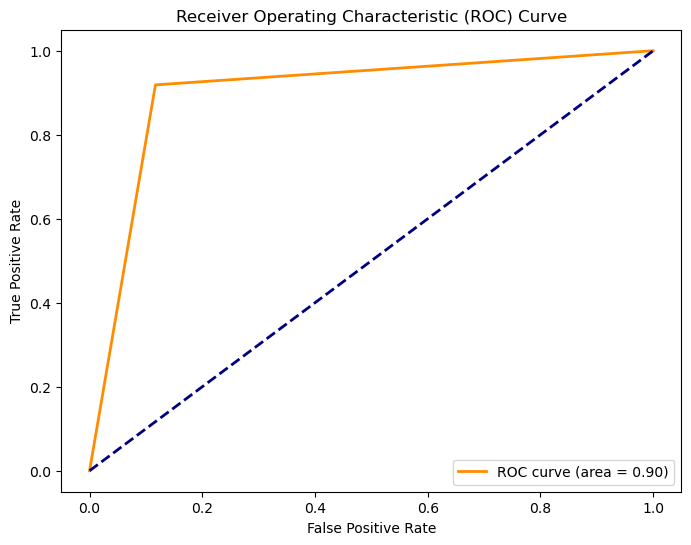

In [53]:
from sklearn.metrics import roc_curve, auc
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Saving The model

In [54]:
# Saving the model using .pkl
import joblib
joblib.dump(rf_model,"census.income.pkl")

['census.income.pkl']

# Conclusion

In [56]:
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(x_train, y_train)
a = np.array(y_test)
predicted = np.array(rf_model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
12763,1,1
12764,0,0
12765,0,0
12766,1,1
